Epoch 1/200
263/263 [==============================] - 2s 4ms/step - loss: 2.1239 - accuracy: 0.3389 - val_loss: 1.5306 - val_accuracy: 0.5679
Epoch 2/200
263/263 [==============================] - 2s 7ms/step - loss: 1.2821 - accuracy: 0.6240 - val_loss: 1.0330 - val_accuracy: 0.6750
Epoch 3/200
263/263 [==============================] - 1s 2ms/step - loss: 0.9464 - accuracy: 0.6756 - val_loss: 0.8232 - val_accuracy: 0.7164
Epoch 4/200
263/263 [==============================] - 1s 4ms/step - loss: 0.8002 - accuracy: 0.6890 - val_loss: 0.7406 - val_accuracy: 0.7250
Epoch 5/200
263/263 [==============================] - 1s 2ms/step - loss: 0.7078 - accuracy: 0.7192 - val_loss: 0.6718 - val_accuracy: 0.7229
Epoch 6/200
263/263 [==============================] - 1s 2ms/step - loss: 0.6477 - accuracy: 0.7518 - val_loss: 0.6009 - val_accuracy: 0.7636
Epoch 7/200
263/263 [==============================] - 1s 2ms/step - loss: 0.5955 - accuracy: 0.7695 - val_loss: 0.5584 - val_accuracy: 0.7907

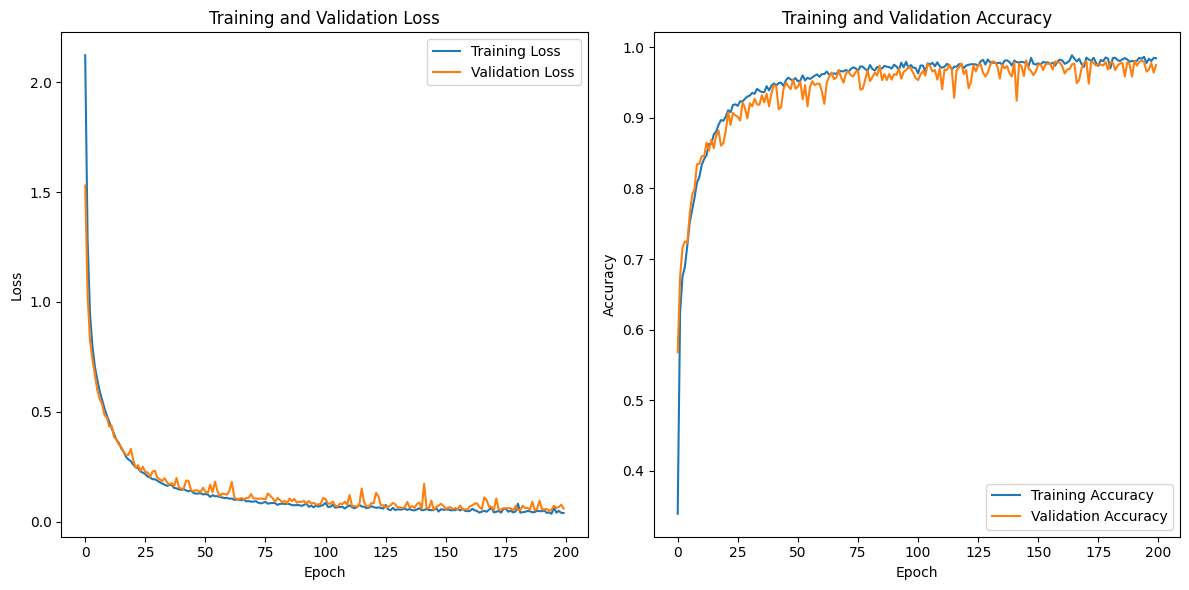

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Загрузка данных из файла XLSX
data = pd.read_excel('database.xlsx')

# Извлечение признаков и целевой переменной
X = data.iloc[:, :-1]  # Признаки (все столбцы кроме последнего)
y = data.iloc[:, -1]  # Целевая переменная (предпоследний столбец)

# Преобразование последнего столбца в one-hot encoding
y_encoded = pd.get_dummies(y)

# Разделение данных на обучающую, валидационную и тестовую выборки
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Создание модели нейронной сети
model = Sequential()
model.add(Dense(27, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_encoded.shape[1], activation='softmax'))  # Для многоклассовой классификации

# Компиляция модели
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Обучение модели
history = model.fit(X_train, y_train, epochs=200, batch_size=16, validation_data=(X_val, y_val))

# Сохранение модели
model.save('my_model.h5')

# Оценка модели на тестовых данных
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy:', accuracy)

# Визуализация истории обучения
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
print(y_encoded)

      1   2   3   4   5   6   7   8   9   10  11  12
0      1   0   0   0   0   0   0   0   0   0   0   0
1      1   0   0   0   0   0   0   0   0   0   0   0
2      0   0   0   0   0   0   0   0   0   0   1   0
3      0   0   0   0   1   0   0   0   0   0   0   0
4      0   0   0   0   1   0   0   0   0   0   0   0
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
6994   0   0   0   0   0   0   0   0   1   0   0   0
6995   0   0   0   1   0   0   0   0   0   0   0   0
6996   0   0   0   0   0   0   0   0   0   0   0   1
6997   0   0   0   0   0   0   0   0   0   0   1   0
6998   0   0   0   0   0   0   0   0   0   0   0   1

[6999 rows x 12 columns]


In [ ]:
import pandas as pd
from tensorflow.keras.models import load_model

# Загрузка данных из файла XLSX
data = pd.read_excel('databasetest.xlsx')

# Извлечение признаков
X = data.iloc[:, :-1]  # Признаки (все столбцы, кроме последних двух)

# Загрузка модели из файла
model = load_model('my_model.h5')

# Прогнозирование классов на новых данных
predictions = model.predict(X)

# Преобразование предсказаний в метки классов
predicted_classes = predictions.argmax(axis=-1)

# Вывод предсказанных классов
print(predicted_classes)

4/4 [==============================] - 0s 3ms/step
[19 19 22 19  2 22 13 13 22 11 12  6 13 14 15  4  4  5  2  0  9  0  2  2
  3  0  4  9 20  0  7  0 13  2 21 15  3 12  0  4 13  7  7  0  0  0 18 10
 16 22  2  2  2 13 19  0  0 14  8  0 11  0  6 10 13 17 17 12 16  9  6  6
  1  7  9  0  5  5  2 13 13  2  0 15  0  4 19 22 12  4 11  4 19 19 18 17
  2  0  7]


In [ ]:
array = []

for element in predicted_classes:
  if element == 0:
    array.append("здоров")
  if element == 1:
    array.append("риск развития сердечно сосудистых заболеваний ")
  if element == 2:
    array.append("риск диабета, возможно раннее повреждение почек")
  if element == 3:
    array.append("риск развития сердечно сосудистых заболеваний ")
  if element == 4:
    array.append("риск развития сердечно сосудистых заболеваний, возможно раннее повреждение почек")
  if element == 5:
    array.append("высокий риск развития сердечно сосудистых заболеваний, развитие хронической почечной болезни, риск появления ретинопатии")
  if element == 6:
    array.append("развитие сердечно сосудистых заболеваний, развитие хронической почечной болезни, появление ретинопатии, образование язв и инфекций на ногах и стопах")
  if element == 7:
    array.append("cтенокардия риск развития острого коронарного синдрома")
  if element == 8:
    array.append("cтенокардия, коронарный синдром, атеросклероз, ухудшение физической активности")
  if element == 9:
    array.append("развитие хронической сердечной недостаточности, ухудшение физической выносливости, риск сердечного приступа или смерти, развитие аритмии")
  if element == 10:
    array.append("затруднение дыхания, быстрая утомляемость")
  if element == 11:
    array.append("повышенная чувствительность к респираторным инфекциям, вероятность повторного заболевания")
  if element == 12:
    array.append("развитие абсцесса легких или эмпиема, вероятность повторного заболевания")
  if element == 13:
    array.append("колики в почках")
  if element == 14:
    array.append("колики в почках воспаления и инфекции")
  if element == 15:
    array.append("развитие хронической почечной недостаточности")
  if element == 16:
    array.append("усталость и слабость, лишний вес, проблемы с концентрацией")
  if element == 17:
    array.append("сухая кожа, замедление сердечного ритма")
  if element == 18:
    array.append("повышенный риск сердечно-сосудистых заболеваний")
  if element == 19:
    array.append("хроническая усталость, повышенное давление")
  if element == 20:
    array.append("отеки, развитие анемии, ослабление имунной системы")
  if element == 21:
    array.append("отеки, развитие анемии, ослабление имунной системы, риск смерти")
  if element == 22:
    array.append("воспаление суставов, боль, отечность и ограничение движения")
  if element == 23:
    array.append("хроническая боль, суставные деформации, снижение силы и подвижности")
  if element == 24:
    array.append("хроническая боль, разрушение суставов, нарушение функции суставов и инвалидность")

i = 0
for j in array:
  i = i + 1
  print(i, j)

1 хроническая усталость, повышенное давление
2 хроническая усталость, повышенное давление
3 воспаление суставов, боль, отечность и ограничение движения
4 хроническая усталость, повышенное давление
5 риск диабета, возможно раннее повреждение почек
6 воспаление суставов, боль, отечность и ограничение движения
7 колики в почках
8 колики в почках
9 воспаление суставов, боль, отечность и ограничение движения
10 повышенная чувствительность к респираторным инфекциям, вероятность повторного заболевания
11 развитие абсцесса легких или эмпиема, вероятность повторного заболевания
12 развитие сердечно сосудистых заболеваний, развитие хронической почечной болезни, появление ретинопатии, образование язв и инфекций на ногах и стопах
13 колики в почках
14 колики в почках воспаления и инфекции
15 развитие хронической почечной недостаточности
16 риск развития сердечно сосудистых заболеваний, возможно раннее повреждение почек
17 риск развития сердечно сосудистых заболеваний, возможно раннее повреждение п